# Gemaakt op 07/05/2025 door martijn

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st

### Portfolio assignment 12
30 min: Perform a bivariate analysis on at least 3 combinations of a numerical column with a categorical column in the dataset that you chose in portfolio assignment 4. Use <em>.groupby('columnname').mean()</em> to calculate the means. Is there a difference between categories? Then use seaborn barplots to check if there is a statistically significant difference.

In [3]:
my_data = pd.read_csv("./games.csv")
my_data

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


Ik heb hier gekozen om voor de volgende combinaties te gaan:
- price_final & mac
- positive_ratio & rating
- user_reviews & linux

Maar ik ga ook op al deze 3 de categorie collommen een check doen qua table, dus dat we ze vergelijken met alles.

Ik kies voor deze omdat ik deze dingen nog niet echt gebruikt heb. Misschien zit er wel een leuke discovery tussen.

## price_final & mac
ik ga er hier vanuit dat er niet echt een verschil zit tussen de prijs van een spel wat mac support en de prijs van een spel dat mac niet support. Maar ik ben wel geintresseerd hierin.

## positive_ratio & rating
dit zijn zover ik weet de zelfde collommen, dus hier ben ik vooral benieuwd waar de grenzen liggen van elke categorie. Want mijn hypotese is dat Mixed niet een ratio van 50 is, maar hoger, want dat is het gevoel dat ik kreeg uit de analyses uit de vorige assignments. Verder denk ik dat `Very positive` rond de 85 zit.

## user_reviews & linux
Alweer denk ik dat er niet echt een verschil zit tussen linux supported games, en games die dat niet zijn wanneer het aankomt tot het aantal reviews dat een spel heeft, maar we zullen het zien. Want ik ben wel erg benieuwd.


In [4]:
my_data.groupby('mac').mean(numeric_only=True)

,app_id,win,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
mac,,,,,,,,,
False,1.118814e+06,0.979025,0.036641,76.279099,1370.044936,8.676895,8.796137,6.003249,0.999947
True,8.703160e+05,0.999846,0.587955,79.299585,3145.680366,8.455830,8.525135,4.396989,1.000000


ik zie hier nog niet iets heel bijzonders, ik zie dat er een verschil zit tussen de user_reviews en de discount. maar tussen de final price lijkt niet echt verschil te zitten.

<Axes: xlabel='mac', ylabel='price_final'>

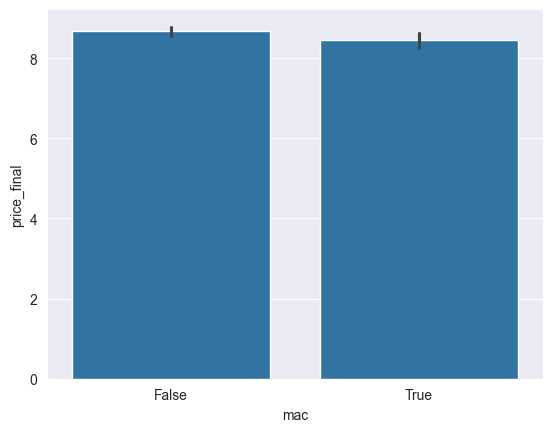

In [7]:
sns.barplot(y="price_final", x="mac", data=my_data)

hierboven zie ik inderdaad dat er vrij weinig verschil tussen zit. wel valt me op dat de 95% range specefieker / kleiner is als het een spel is dat mac niet support.

In [5]:
my_data.groupby('linux').mean(numeric_only=True)

,app_id,win,mac,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
linux,,,,,,,,,
False,1.097940e+06,0.981043,0.128230,76.472855,1446.959097,8.678082,8.777169,5.749133,0.999952
True,8.575860e+05,0.999668,0.846588,79.731777,3570.888397,8.353095,8.493687,4.866165,1.000000


ik zie hier een groot verschil bij de reviews, dus dat is wel interresant, en grappig dat we deze combi gekozen hadden. Laten we er naar kijken.
Verder zie ik ook een groot verschil tussen mac support, en dat vindt ik interresant want dat zag ik niet in de mac analyse

<Axes: xlabel='linux', ylabel='user_reviews'>

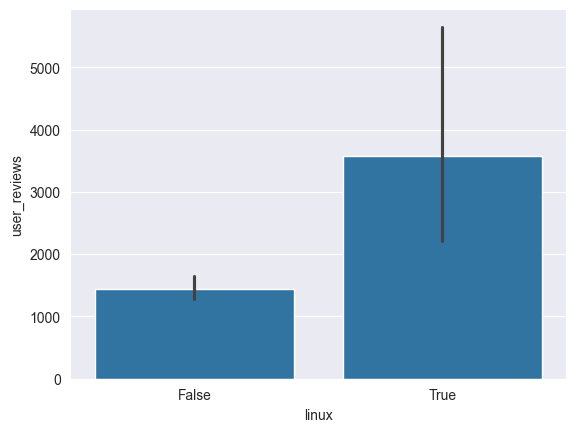

In [10]:
sns.barplot(y="user_reviews", x="linux", data=my_data)

vdit verbaast me best wel erg. Wat we hier zien is dat de spellen die linux support hebben gemiddeld 2000 meer reviews hebben, maar de 95% range bij de linux supported spellen is ook mega groot. De range is zo'n 3.5 duizen reviews. waarbij de range van niet linux supported spellen op oogopslag zo'n 250 is.

In [9]:
my_data.groupby('rating').mean(numeric_only=True)

,app_id,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
rating,,,,,,,,,,
Mixed,9.475811e+05,0.997615,0.217652,0.145924,57.643004,673.404623,8.689993,8.887407,5.634861,1.000000
Mostly Negative,9.070683e+05,0.996755,0.181720,0.127096,31.276906,262.856679,8.075890,8.368237,4.369930,1.000000
Mostly Positive,9.871800e+05,0.995651,0.252346,0.174640,74.555848,972.998741,9.039239,9.342981,6.425727,0.999886
Negative,9.797953e+05,1.000000,0.148515,0.079208,11.851485,18.353135,8.199736,8.683630,5.580858,1.000000
Overwhelmingly Negative,1.098200e+06,1.000000,0.285714,0.285714,14.214286,15895.857143,8.600000,8.707143,3.571429,1.000000
Overwhelmingly Positive,9.563820e+05,0.996396,0.427027,0.296396,96.240541,19342.163063,11.943829,9.384532,3.441441,1.000000
Positive,1.302729e+06,0.958377,0.222263,0.158939,91.210191,21.614279,6.569432,7.210273,6.775811,1.000000
Very Negative,1.027496e+06,1.000000,0.166667,0.016667,13.633333,143.950000,10.217500,9.424167,1.383333,1.000000
Very Positive,9.767496e+05,0.988051,0.327042,0.228480,88.802040,4082.434432,10.183092,9.719514,4.157470,0.999924


ik zie hier veel verschillen langs komen, positive_ratio, user_reviews, final_price. daar zie ik verschillen tussen. Mijn doel was alleen in te zoomen op positive_ratio, maar ik ga ook inzoomen op de andere 2, want dat vindt ik ook wel interresant.

<Axes: xlabel='rating', ylabel='positive_ratio'>

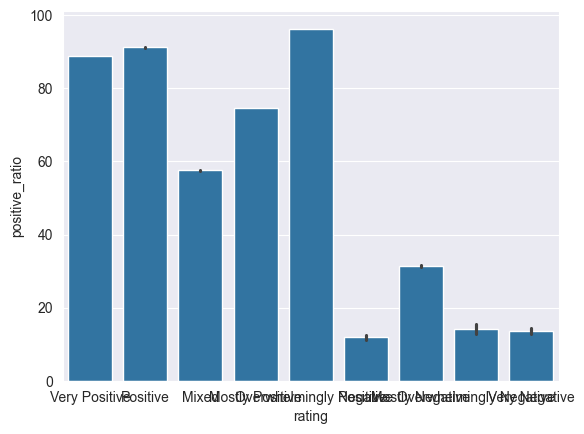

In [19]:
sns.barplot(y="positive_ratio", x="rating", data=my_data)

dit is een beetje onmogelijk te lezen xD


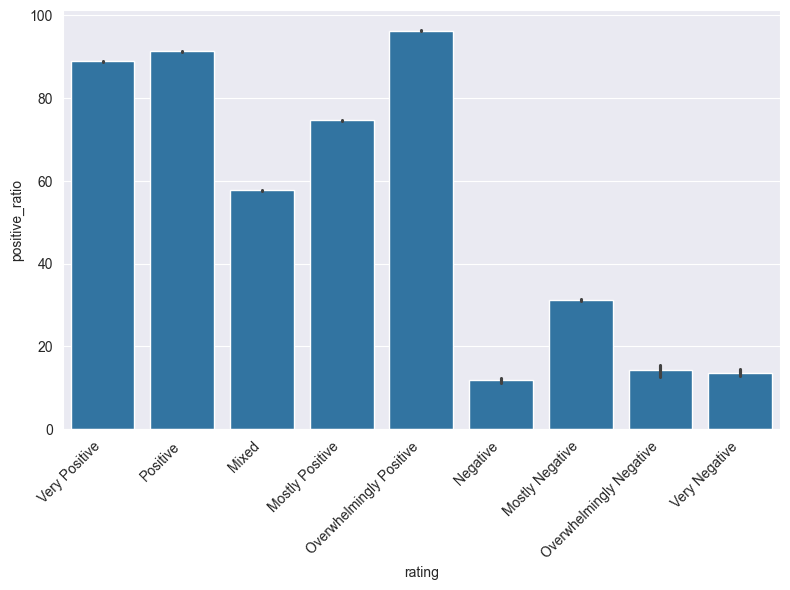

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
ax = sns.barplot(y="positive_ratio", x="rating", data=my_data)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

zo dat is iets beter. Hier zijn de dingen die me opvallen:
- Ik zie dat er niks aan de 100 zit dus dat vindt ik interresant. net zoals dat er niks op de 0 zit.
- very positive is lager dan positive?
- mixed is ongeveer 60
- negative is lager dan very negative en overwhelmingly negative.

dit verteld mij dat de positiva ratio niks zegt over welke tags steam er aan hangt als rating. dit vindt ik nog eens een interresant resultaat. en ik had nog eens gelijk ook met de mixed voorspelling :3



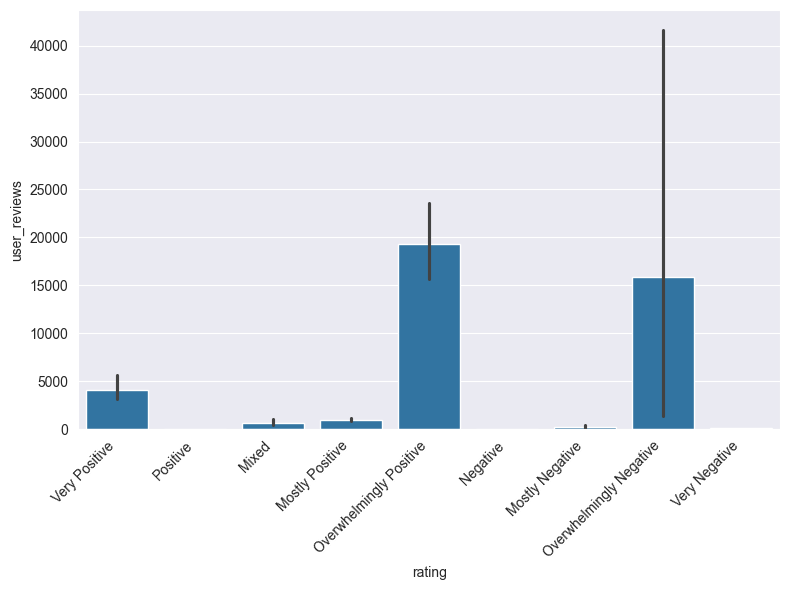

In [21]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(y="user_reviews", x="rating", data=my_data)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ik zie hier dat er een relatie zou kunnen zijn, maar ik denk eerder dat het een beetje random is. Wat ook zou kunnen is dat je pas Overwhelmingly scores kan krijgen na X reviews. Want dat zou je hier wel uit kunnen opmaken.

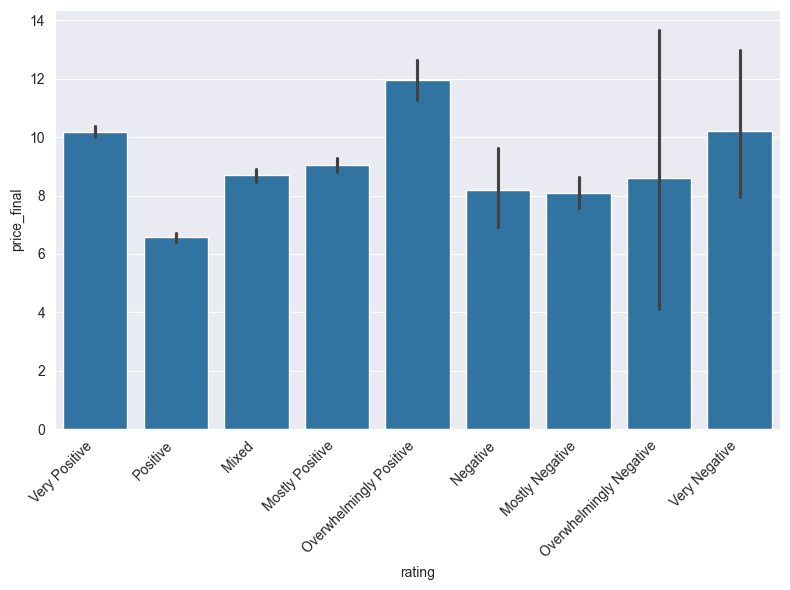

In [22]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(y="price_final", x="rating", data=my_data)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

het zou kunnen dat er een relatie is tussen kosten en rating, maar het ziet er vrij random uit, en logica verteld me dat prijs niks te maken heeft met de rating.